In [155]:
import db.knowhere_db as kdb
import pipeline.pipeline as pipeline
import pandas as pd
import numpy as np
from time import time
#%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [104]:
glen_H_data_raw = pd.read_csv("Labeled_glen_2017-03-19 to 2017-03-23.csv")

In [105]:
glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z', 'Altimeter (Barometer) Pressure',\
                               'Microphone Left Channel Level', 'Microphone Right Channel Level','Magnetometer x',\
                               'Magnetometer y','Magnetometer z','Gyrometer x','Gyrometer y',\
                               'Gyrometer z', 'classification']]
glen_H_data = glen_H_data.dropna()
glen_H_data.iloc[:,0:11].astype(float)

,Acceleration x,Acceleration y,Acceleration z,Altimeter (Barometer) Pressure,Microphone Left Channel Level,Microphone Right Channel Level,Magnetometer x,Magnetometer y,Magnetometer z,Gyrometer x,Gyrometer y
9,0.035286,-0.032134,-0.174451,101.297173,-22.18490,-22.18490,-48.244934,139.584091,-442.558044,-0.189776,-0.747892
10,0.045886,-0.052843,0.180941,101.301842,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667
11,0.037488,-0.080072,0.024071,101.297859,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667
12,0.104773,-0.102392,0.040786,101.294731,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667
13,0.196326,-0.233689,-0.079535,101.297264,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667
14,-0.050452,-0.124135,-0.159513,101.299042,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667
15,-0.071883,-0.096012,0.228122,101.298973,-5.64593,-5.64593,-60.778305,147.310150,-456.454407,0.186489,1.126667
16,-0.188200,0.358660,-1.074619,101.302010,-5.64593,-5.64593,-55.284225,109.881699,-443.048523,0.186489,1.126667
17,-0.124106,0.023692,-0.032372,101.300888,-5.64593,-5.64593,-55.284225,109.881699,-443.048523,0.186489,1.126667
18,-0.108972,-0.171239,0.021897,101.301849,-5.64593,-5.64593,-55.284225,109.881699,-443.048523,0.186489,1.126667


In [107]:
glen_H_data = glen_H_data.replace(to_replace='T_E', value='T_S')
glen_H_data.groupby("classification").size()

classification
D      1749
E_D     405
E_U     480
S       251
S_U      31
T_D    1159
T_S     749
T_T      40
W      1038
dtype: int64

In [108]:
glen_H_data['Acceleration'] =  np.sqrt(glen_H_data['Acceleration x']**2 + glen_H_data['Acceleration y']**2 +\
                                       glen_H_data['Acceleration z']**2)
glen_H_data['Magnetometer'] =  np.sqrt(glen_H_data['Magnetometer x']**2 + glen_H_data['Magnetometer y']**2 +\
                                       glen_H_data['Magnetometer z']**2)
glen_H_data['Gyrometer']    =  np.sqrt(glen_H_data['Gyrometer x']**2 + glen_H_data['Gyrometer y']**2 +\
                                       glen_H_data['Gyrometer z']**2)
glen_H_data['Microphone']    =  (glen_H_data['Microphone Left Channel Level'] +\
                                glen_H_data['Microphone Right Channel Level'])/2
glen_H_data = glen_H_data[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]

In [109]:
# set window
window = 5
# Rolling Means
glen_H_data['RollingMeanAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).mean()
# Rolling 75th percentile
glen_H_data['Rolling75thAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['RollingMeanAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).quantile(quantile=0.75)
# Rolling Max
glen_H_data['RollingMaxAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).max()
glen_H_data['RollingMaxAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).max()
# Rolling Min
glen_H_data['RollingMinAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).min()
glen_H_data['RollingMinMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).min()
glen_H_data['RollingMinGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).min()
glen_H_data['RollingMinMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).min()
glen_H_data['RollingMinAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).min()
# Rolling st dev
glen_H_data['RollingSDAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
glen_H_data['RollingSDGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).std()
glen_H_data['RollingSDAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).std()
# Rolling var
glen_H_data['RollingVarAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).var()
glen_H_data['RollingVarMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).var()
glen_H_data['RollingVarGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).var()
glen_H_data['RollingVarMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).var()
glen_H_data['RollingVarAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).var()

In [110]:
glen_H_data = glen_H_data.dropna()
glen_H_data_re = glen_H_data.iloc[:,range(0,5) + range(6,35) + [5]]

In [111]:
# load dataset
dataset = glen_H_data_re.values
X = dataset[:,0:33]
Y = dataset[:,34]
X, Y = shuffle(X, Y, random_state=123)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
X_scaled = StandardScaler().fit_transform(X)
# One Hot Encode
#lb = LabelBinarizer()
#lb.fit(encoded_Y)
#dummy_y = lb.fit_transform(encoded_Y)

In [112]:
glen_H_data_re.groupby("classification").size()

classification
D      1745
E_D     405
E_U     480
S       251
S_U      31
T_D    1159
T_S     749
T_T      40
W      1038
dtype: int64

In [113]:
KNN = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
RF_Class = RandomForestClassifier(n_estimators=1000)
GBM = GradientBoostingClassifier(n_estimators=1000)

In [121]:
stacked_class = StackingCVClassifier(classifiers= [GBM, RF_Class], 
                                     use_probas=True,
                                     meta_classifier=GBM)
print('5-fold cross validation:\n')

for clf, label in zip([GBM, RF_Class, KNN, NN, lr, stacked_class], 
                      ['GBM',
                       'RF_Class',
#                       'KNN',
#                       'NN', 
#                       'lr',
                       'StackingClassifier']):


    scores = model_selection.cross_val_score(clf, X_scaled, encoded_Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

#5-fold cross validation:
#Accuracy: -0.05 (+/- 0.02) [GBM]
#Accuracy: -0.16 (+/- 0.03) [RF_Class]
#Accuracy: -1.38 (+/- 0.13) [KNN]
#Accuracy: -1.33 (+/- 0.01) [NN]
#Accuracy: -1.33 (+/- 0.02) [lr]
#Accuracy: -0.87 (+/- 0.01) [StackingClassifier]

5-fold cross validation:

Accuracy: 0.99 (+/- 0.00) [GBM]
Accuracy: 0.99 (+/- 0.00) [RF_Class]
Accuracy: 0.86 (+/- 0.01) [StackingClassifier]


In [118]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
stacked_class.fit(x_train, y_train)
Y_pred = stacked_class.predict(x_test)

In [120]:
Labels = encoder.inverse_transform(encoded_Y)
print np.unique(Labels)
confusion_matrix(y_test,Y_pred)

['D' 'E_D' 'E_U' 'S' 'S_U' 'T_D' 'T_S' 'T_T' 'W']


array([[559,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1, 130,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0, 163,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,  81,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,  10,   0,   0,   0,   0],
       [  1,   0,   6,   0,   0, 372,   2,   0,   0],
       [  0,   0,   0,   0,   0,   4, 254,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  12,   0],
       [  1,   0,   0,   0,   0,   0,   1,   0, 343]])

In [126]:
# Binarize the output
Y = label_binarize(encoded_Y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = Y.shape[1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.7, random_state=0)

In [151]:
#classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=1000))
classifier = OneVsRestClassifier(lr)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict_proba(X_test)

In [152]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

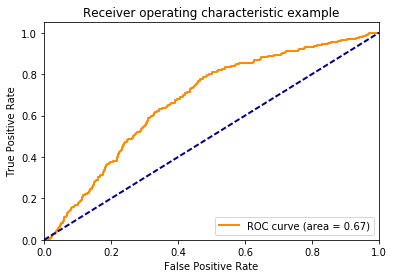

In [153]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")



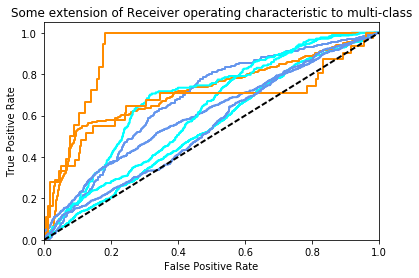

In [157]:
# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
#plt.legend(loc="lower right")
plt.show()